C:\Users\My PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Hyperparameters: {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}

Model Performance Metrics:

          Accuracy  Precision    Recall  F1 Score
Training  0.898613   0.898034  0.898613  0.897946
Testing   0.897864   0.897701  0.897864  0.897310


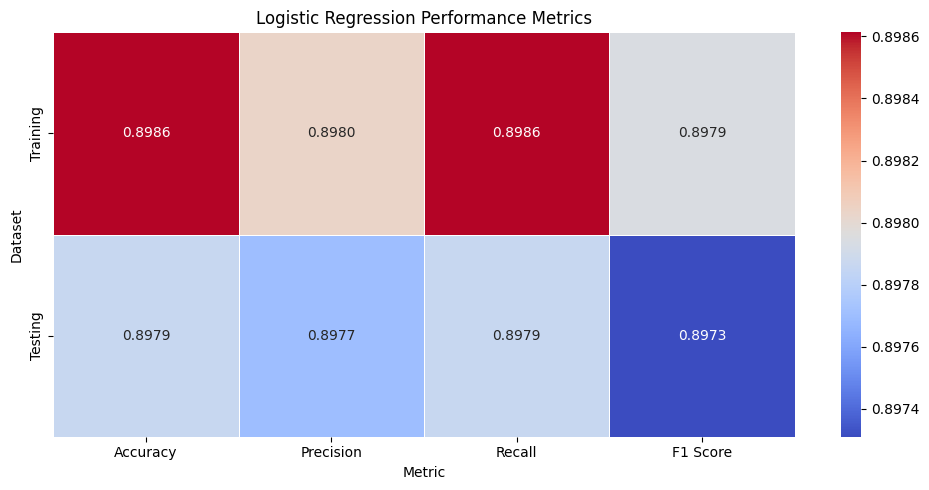

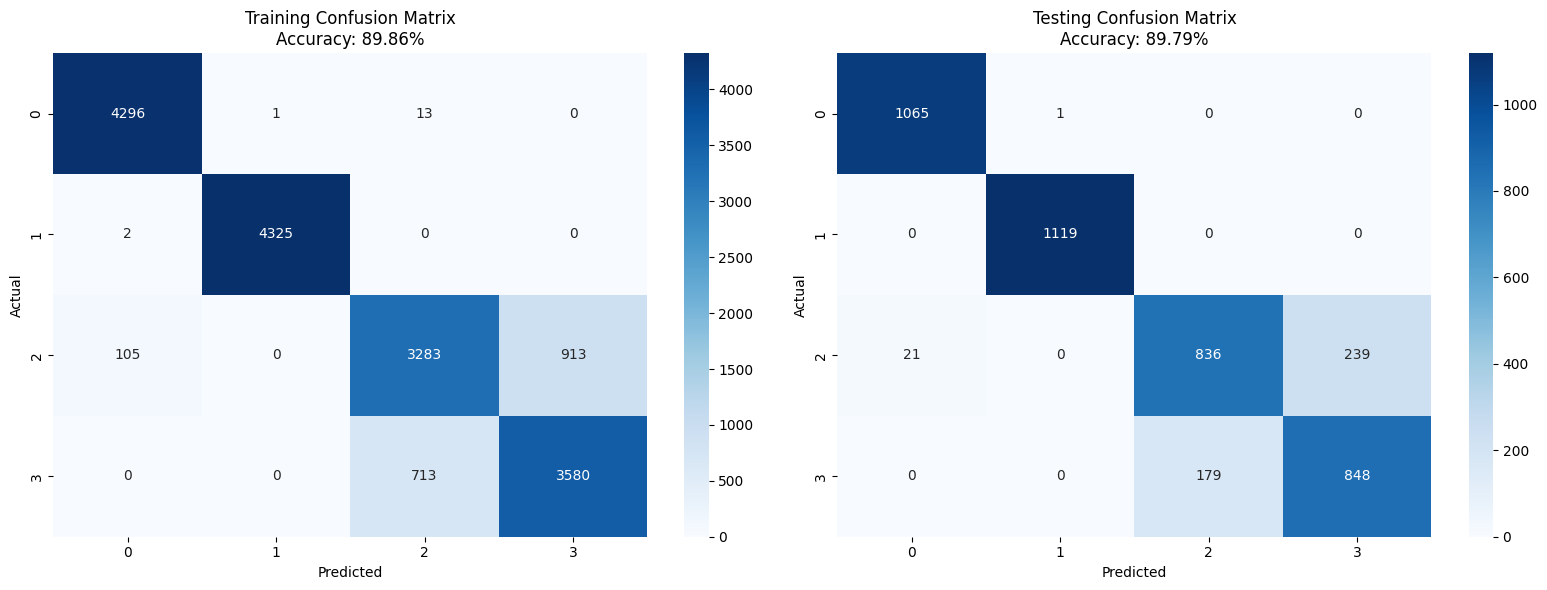

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

def perform_logistic_regression(input_file):
    df = pd.read_csv(input_file)

    # Separate features and target
    X = df.drop('Target', axis=1)
    y = df['Target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression with hyperparameter tuning
    model = LogisticRegression(max_iter=1000)
    param_grid = {
        'C': [200],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Predictions
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Metrics
    metrics = {
        'Accuracy': [
            accuracy_score(y_train, y_train_pred),
            accuracy_score(y_test, y_test_pred)
        ],
        'Precision': [
            precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
            precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
        ],
        'Recall': [
            recall_score(y_train, y_train_pred, average='weighted'),
            recall_score(y_test, y_test_pred, average='weighted')
        ],
        'F1 Score': [
            f1_score(y_train, y_train_pred, average='weighted'),
            f1_score(y_test, y_test_pred, average='weighted')
        ]
    }

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame(metrics, index=['Training', 'Testing'])

    # Display results
    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    print("\nModel Performance Metrics:\n")
    print(metrics_df)

    # Plot heatmap of metrics
    plt.figure(figsize=(10, 5))
    sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
    plt.title("Logistic Regression Performance Metrics")
    plt.ylabel("Dataset")
    plt.xlabel("Metric")
    plt.tight_layout()
    plt.show()

    # Confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f"Training Confusion Matrix\nAccuracy: {metrics_df.loc['Training', 'Accuracy']:.2%}")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f"Testing Confusion Matrix\nAccuracy: {metrics_df.loc['Testing', 'Accuracy']:.2%}")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# 🔧 Usage Example
perform_logistic_regression("data.csv")
